1. Introduction

   The goal of the research paper is to see if age plays a role in gene expression. Blood samples were taken from participants between the ages of 47 and 83. The gene expression levels of select genes were then determined and recorded in the data frame that is used in this project. 

2. Part 2: Relate research questions, data, and figures

   2.1: Project Part 2
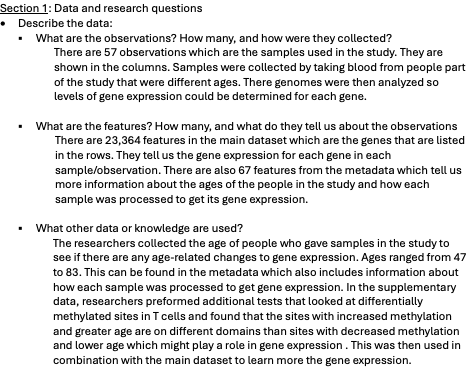
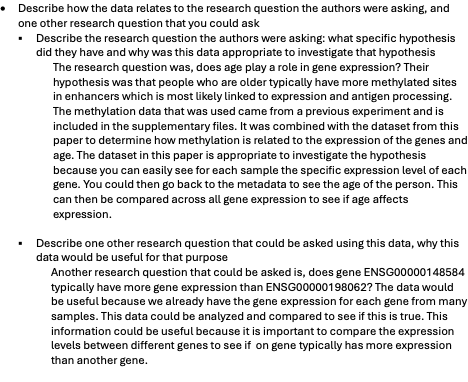
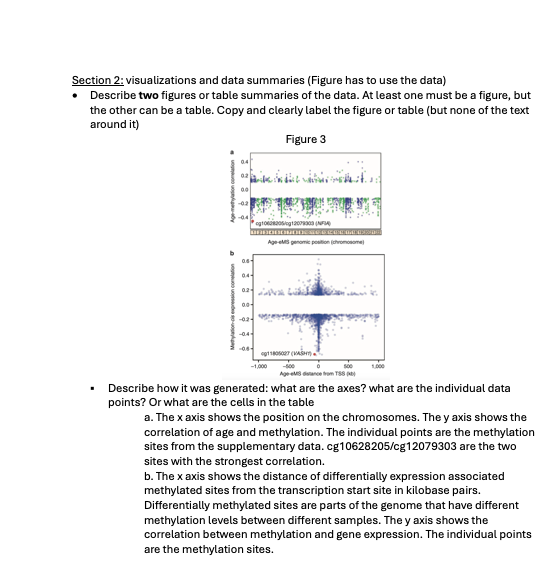
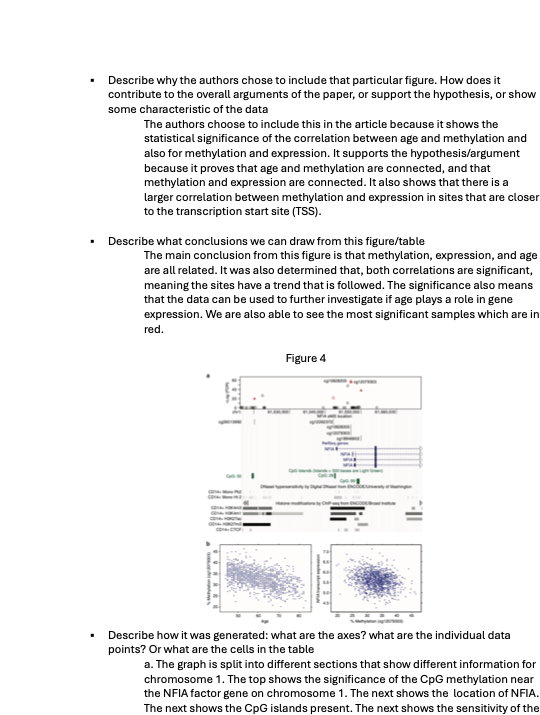
[image.png](attachment:1885a3d2-8883-4c09-a25d-2b60e358771a.png)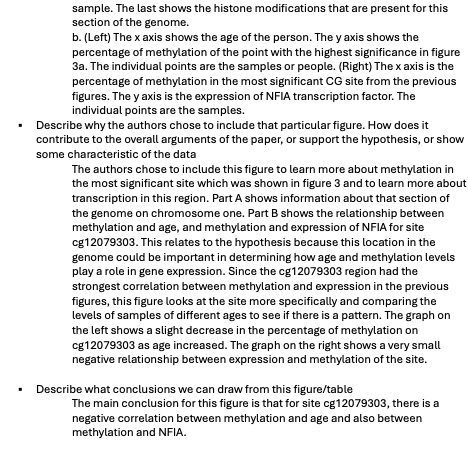
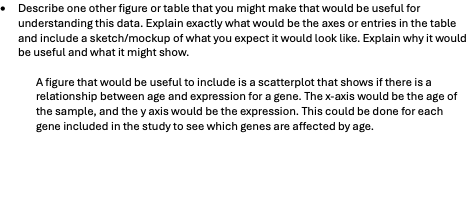
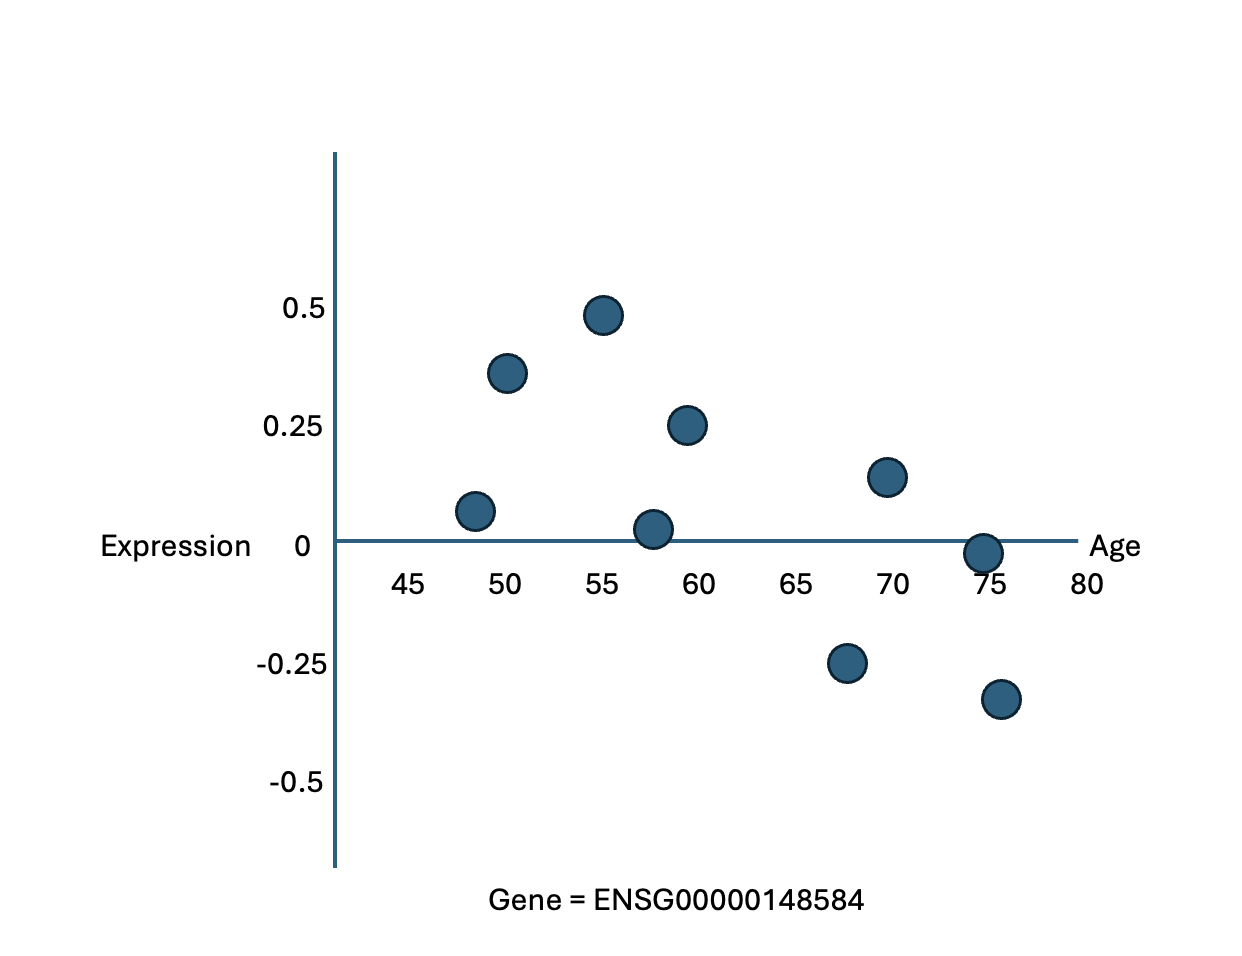
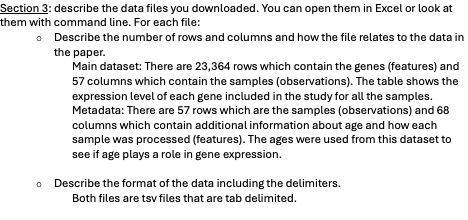



   2.2: Summary of improvements

To improve my answers, I added more details and explanations to be more clear. In section 1, I was more specific about how the data was generated. In section 2, I added more details to my explainations of both figures to better explain what they were showing so others can understand their main conclusions and how they relate to the research. I also remade my figure for the last part. I realized that the previous figure I made was not very useful to the research. This new figure uses the more data and is related more to the main purpose of the research.
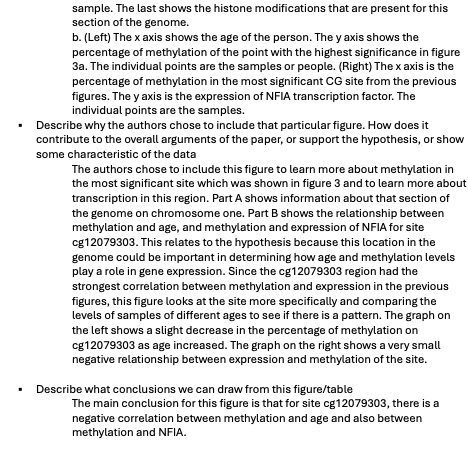

In [1]:
import pandas as pd
import seaborn as sns

3. Part 3: Data cleaning and exploration

   3.1: Load and clean data
   
   - Click this link to find the article on refine.bio: https://www.refine.bio/experiments/GSE56047/transcriptomics-and-methylomics-of-human-monocytes
   - Select download now and enter your email so it will alert you when it is finished downloading
   - Open the folder that was downloaded
   - Inside should be another folder called GSE56047, open this and there are 2 tsv files in it.  ***Make sure to put this code notebook in this folder so the code will work


Dataset 1:

You can use pd.read_csv to read in the file as a dataframe. The file is tab seperated which needs to be specified.

In [2]:
df = pd.read_csv('GSE56047.tsv',sep = '\t')
df.head()

,Gene,GSM1352007,GSM1352021,GSM1352057,GSM1352108,GSM1352131,GSM1352134,GSM1352167,GSM1352169,GSM1352171,...,GSM1352924,GSM1352928,GSM1352937,GSM1352955,GSM1352974,GSM1353073,GSM1353078,GSM1353115,GSM1353127,GSM1353156
0,ENSG00000148584,0.129411,0.174303,0.239461,0.115655,-0.018367,0.105781,-0.029337,0.013210,0.129285,...,0.272110,0.185199,0.001776,0.010235,0.162943,0.308057,0.085477,0.306180,0.058581,0.392568
1,ENSG00000198062,0.145865,0.220794,0.095347,0.324769,0.216810,0.298080,0.229996,0.117286,0.416721,...,0.292713,0.496246,0.182172,0.235724,0.091728,-0.040831,0.011935,0.482402,0.129347,0.144503
2,ENSG00000187537,0.504515,0.400883,0.502762,0.410157,0.248710,0.464650,0.342737,0.243537,0.530813,...,0.335954,0.621023,0.419822,0.239531,0.342294,0.171769,0.284442,0.567300,0.288269,0.691530
3,ENSG00000222036,1.504336,1.686595,1.674610,1.678891,1.627664,1.678561,1.646194,1.746850,1.743108,...,1.605488,1.468772,1.697126,1.864126,1.627338,1.664572,1.747889,1.914881,1.675620,1.611427
4,ENSG00000078328,0.087147,-0.058558,-0.074659,-0.057858,-0.000451,-0.027852,0.206074,-0.045360,0.043003,...,0.240468,0.098876,-0.001052,0.116158,0.088970,0.103279,0.068108,0.085359,0.062337,0.014309


The only step to clean this data is to set the index to gene name. To check to make sure there are no more steps, you can see if there are any rows that do not have any data or have NaN values. This can be done using pd.isnull. A true means that there was a NaN value, a false means that there is data. To make sure everything has a false, add the number of trues for each row. Since every row has zero, we know there is no missing data and the dataframe does not need to be cleaned.

In [3]:
expression = df.set_index('Gene')
print(expression)

                 GSM1352007  GSM1352021  GSM1352057  GSM1352108  GSM1352131  \
Gene                                                                          
ENSG00000148584    0.129411    0.174303    0.239461    0.115655   -0.018367   
ENSG00000198062    0.145865    0.220794    0.095347    0.324769    0.216810   
ENSG00000187537    0.504515    0.400883    0.502762    0.410157    0.248710   
ENSG00000222036    1.504336    1.686595    1.674610    1.678891    1.627664   
ENSG00000078328    0.087147   -0.058558   -0.074659   -0.057858   -0.000451   
...                     ...         ...         ...         ...         ...   
ENSG00000203995   -0.084857   -0.132406   -0.106823   -0.090300   -0.188693   
ENSG00000162378    4.888197    5.938785    7.894461    8.481184    7.873803   
ENSG00000159840   11.415299   15.071410   17.215123   16.084233   14.454597   
ENSG00000074755    3.024053    3.270243    3.489816    3.204366    3.608799   
ENSG00000036549    4.394440    3.128896    3.402856 

In [4]:
check = pd.isnull(expression)
print(check)

                 GSM1352007  GSM1352021  GSM1352057  GSM1352108  GSM1352131  \
Gene                                                                          
ENSG00000148584       False       False       False       False       False   
ENSG00000198062       False       False       False       False       False   
ENSG00000187537       False       False       False       False       False   
ENSG00000222036       False       False       False       False       False   
ENSG00000078328       False       False       False       False       False   
...                     ...         ...         ...         ...         ...   
ENSG00000203995       False       False       False       False       False   
ENSG00000162378       False       False       False       False       False   
ENSG00000159840       False       False       False       False       False   
ENSG00000074755       False       False       False       False       False   
ENSG00000036549       False       False       False 

In [5]:
check.sum()

GSM1352007    0
GSM1352021    0
GSM1352057    0
GSM1352108    0
GSM1352131    0
GSM1352134    0
GSM1352167    0
GSM1352169    0
GSM1352171    0
GSM1352172    0
GSM1352249    0
GSM1352271    0
GSM1352276    0
GSM1352281    0
GSM1352296    0
GSM1352322    0
GSM1352328    0
GSM1352350    0
GSM1352351    0
GSM1352366    0
GSM1352377    0
GSM1352379    0
GSM1352390    0
GSM1352393    0
GSM1352394    0
GSM1352399    0
GSM1352402    0
GSM1352521    0
GSM1352585    0
GSM1352630    0
GSM1352647    0
GSM1352652    0
GSM1352659    0
GSM1352668    0
GSM1352681    0
GSM1352698    0
GSM1352706    0
GSM1352738    0
GSM1352801    0
GSM1352809    0
GSM1352845    0
GSM1352855    0
GSM1352858    0
GSM1352869    0
GSM1352892    0
GSM1352916    0
GSM1352921    0
GSM1352924    0
GSM1352928    0
GSM1352937    0
GSM1352955    0
GSM1352974    0
GSM1353073    0
GSM1353078    0
GSM1353115    0
GSM1353127    0
GSM1353156    0
dtype: int64

Dataset 2:

The metadata file can be loaded in the same way. Most of the information from this file is about how the samples were processed. The most important information is the age of the person. A new dataset can be made with just the age and accession code. The index can then be set to the accession code.

In [6]:
df2 = pd.read_csv('metadata_GSE56047.tsv', sep = '\t')
df2.head()

x = df2['refinebio_accession_code'],df2['refinebio_age']
ages = pd.DataFrame(x).transpose()
ages = ages.set_index('refinebio_accession_code')
ages

,refinebio_age
refinebio_accession_code,
GSM1352007,60.0
GSM1352021,59.0
GSM1352057,58.0
GSM1352108,53.0
GSM1352131,54.0
GSM1352134,63.0
GSM1352167,66.0
GSM1352169,45.0
GSM1352171,45.0


3.2: Describe data numerically

Dataset 1 (expression): There are 23364 rows which are the genes that were studied - these are the features. There are 57 columns which are the samples that were collected for the research - these are the observations. These numbers are shown in the code below. The first value in the output corresponds to the number of rows, the second number corresponds to the number of columns.

In [7]:
expression.shape

(23364, 57)

Dataset 2 (ages): There are 57 rows which are the sample accession codes - these are the observations. There is 1 column which is the age - this is the feature. These numbers are shown in the code below. The first value in the output corresponds to the number of rows, the second number corresponds to the number of columns.

In [8]:
ages.shape

(57, 1)

We can combine these datasets into 1 dataframe 

- Use transpose to swap the rows and columns in the variable expression so the data can be combined
- Then use the concat function to add the age of the person the sample is from.
- This new dataframe still has 57 rows (sample accession codes) which are the observations. And now has 23365 columns (genes and age) which are the features.

In [9]:
new = expression.transpose()
lists = (new,ages)
combined = pd.concat(lists, axis = 1)
combined

,ENSG00000148584,ENSG00000198062,ENSG00000187537,ENSG00000222036,ENSG00000078328,ENSG00000134864,ENSG00000175899,ENSG00000166535,ENSG00000128274,ENSG00000118017,...,ENSG00000174442,ENSG00000122952,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549,refinebio_age
GSM1352007,0.129411,0.145865,0.504515,1.504336,0.087147,2.334455,-0.093036,-0.409981,-0.122222,0.638211,...,1.092661,0.706791,0.540961,1.111907,-0.084857,4.888197,11.415299,3.024053,4.394440,60.0
GSM1352021,0.174303,0.220794,0.400883,1.686595,-0.058558,1.973135,-0.169288,-0.471758,-0.093964,0.241269,...,1.141349,0.157318,0.022456,0.711863,-0.132406,5.938785,15.071410,3.270243,3.128896,59.0
GSM1352057,0.239461,0.095347,0.502762,1.674610,-0.074659,2.440240,0.007033,-0.241270,-0.133736,0.380132,...,1.112351,0.056596,0.976093,1.043987,-0.106823,7.894461,17.215123,3.489816,3.402856,58.0
GSM1352108,0.115655,0.324769,0.410157,1.678891,-0.057858,1.971202,-0.052441,-0.180787,-0.139013,0.109651,...,1.145055,0.023282,0.480984,1.361350,-0.090300,8.481184,16.084233,3.204366,3.382326,53.0
GSM1352131,-0.018367,0.216810,0.248710,1.627664,-0.000451,1.578650,-0.114332,-0.173671,0.309446,0.476797,...,1.065191,0.203602,0.899254,1.183206,-0.188693,7.873803,14.454597,3.608799,3.444134,54.0
GSM1352134,0.105781,0.298080,0.464650,1.678561,-0.027852,1.844133,-0.195473,-0.242662,0.047133,0.152638,...,1.137236,0.123135,0.161762,1.420557,-0.199067,8.249132,14.704838,3.138038,3.045348,63.0
GSM1352167,-0.029337,0.229996,0.342737,1.646194,0.206074,1.892797,-0.054348,-0.306871,-0.067401,0.412184,...,1.093537,0.075002,0.363220,1.092444,-0.014935,7.931436,19.378355,2.739498,2.949948,66.0
GSM1352169,0.013210,0.117286,0.243537,1.746850,-0.045360,2.094066,0.127075,-0.192787,0.064760,0.066716,...,1.288348,0.015075,1.021221,1.328096,0.004002,7.628327,16.084233,2.947857,3.511797,45.0
GSM1352171,0.129285,0.416721,0.530813,1.743108,0.043003,1.978718,-0.130036,-0.194830,-0.215308,0.138535,...,1.031450,0.147919,0.532230,0.872161,-0.132481,7.493772,13.702714,3.089726,3.075976,45.0
GSM1352172,0.300007,0.471321,0.517966,1.688602,-0.109071,2.457520,-0.056416,-0.157743,-0.243132,0.246587,...,1.119066,0.070278,0.352350,1.534660,-0.155260,9.335908,17.392302,3.585931,3.148276,64.0


In [10]:
combined.shape

(57, 23365)

Feature 1: ENSG00000148584

I expect that the describe function will summarize the data from this gene's column. It should include the percentiles, minimum, maximum, count, average, and standard deviation of expression levels. Since every observation has data for this gene, I expect the count to be 57. Also, since the expression levels are low for this gene, I expect the average to be about 0.1

In [11]:
combined['ENSG00000148584'].describe()

count    57.000000
mean      0.138228
std       0.115016
min      -0.041575
25%       0.044308
50%       0.129285
75%       0.213682
max       0.414521
Name: ENSG00000148584, dtype: float64

My prediction of these values was correct. The count is 57 and the average is 0.138.

Feature 2: ENSG00000198062

I expect the describe function's output will have the same format as the previous code. For this feature, since every sample has data for the gene, the count will be 57. The average should be about 0.15.

In [12]:
combined['ENSG00000198062'].describe()

count    57.000000
mean      0.202520
std       0.127608
min      -0.050466
25%       0.122953
50%       0.173106
75%       0.292713
max       0.496246
Name: ENSG00000198062, dtype: float64

This output was similar to what I expected. The values included are the same from the previous code. The count is 57 and the average is 0.2.

3.3: Visualizations

Plot 1:
- The first plot I want to make is a relplot showing the relationship between age of the sample and expression of ENSG00000148584 (feature 1). This is appropriate for the dataset because it will help show the age of the sample and the expression level it has. It can then be used to see if this gene has different expression levels for people of different ages.
- I used sns.relplot to make the plot. I set data to the combined data frame. X is set to age and y is set to gene expression.

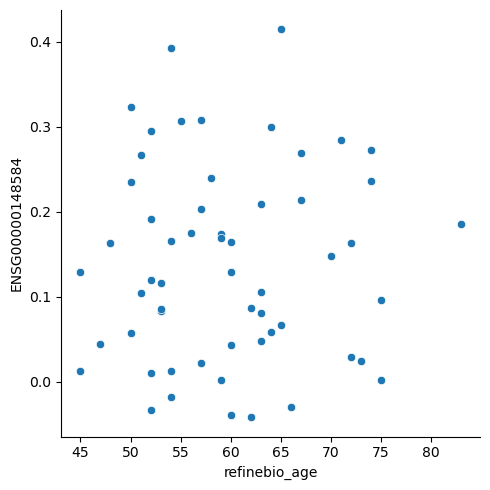

In [13]:
sns.relplot(data = combined, x = 'refinebio_age', y = 'ENSG00000148584')

- When I compare this plot to the describe function output, I can see that the maximum exppression level is 0.414521 which corresponds to the highest point on the plot with an age of about 67. The minimum expression is -0.041575 which corresponds to the lowest point with an age of about 63. The pattern of the points on the plot may be useful to see if age plays a role in gene expression for this gene. Since the points are very scattered and do not have a clear pattern, a conclusion could be that age and expression of this gene are not related. This relates to the hypothesis of the research paper because it compares expression and age which are the two main things that were studied.

Plot 2:
- The second plot I want to make is similar to the first one. For this one I will determine if there is a relationship between age and another gene, ENSG00000198062 (feature 2). This is appropriate for the dataset because it will help show the age of the sample and the expression level it has. It can then be used to see if this gene has different expression levels for people of different ages.
- I used sns.relplot to make the plot. I set data to the combined data frame. X is set to age and y is set to gene expression.

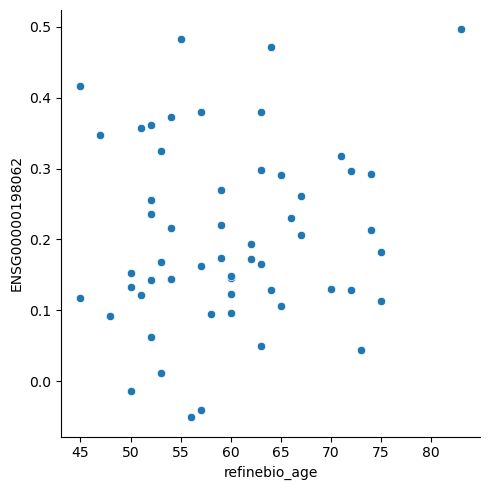

In [14]:
sns.relplot(data = combined, x = 'refinebio_age', y = 'ENSG00000198062')

- When I compare this plot to the describe function output, I can see that the maximum exppression level is 0.496246 which corresponds to the highest point on the plot with an age of about 83. The minimum expression is -0.050466 which corresponds to the lowest point with an age of about 56. The pattern of the points on the plot may be useful to see if age plays a role in gene expression for this gene. In this plot there is a slight positive increase of the points as you look from left to right. The conclusion that could be made is that as age increases, gene expression of this gene also increases slightly. This relates to the hypothesis of the research paper because it compares expression and age which are the two main things that were studied.